In [1]:
!pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


Q1 Make a MLP and test on some dataset

In [4]:
# -*- coding: utf-8 -*-
import torch
import torchvision

# # N is batch size; D_in is input dimension;
# # H is hidden dimension; D_out is output dimension.
# N, D_in, H, D_out = 64, 1000, 100, 10

# # Create random Tensors to hold inputs and outputs
# x = torch.randn(N, D_in)
# y = torch.randn(N, D_out)

# # Construct our model by instantiating the class defined above
# model = TwoLayerNet(D_in, H, D_out)

# # Construct our loss function and an Optimizer. The call to model.parameters()
# # in the SGD constructor will contain the learnable parameters of the two
# # nn.Linear modules which are members of the model.
# criterion = torch.nn.MSELoss(reduction='sum')
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
# for t in range(500):
#     # Forward pass: Compute predicted y by passing x to the model
#     y_pred = model(x)

#     # Compute and print loss
#     loss = criterion(y_pred, y)
#     if t % 100 == 99:
#         print(t, loss.item())

#     # Zero gradients, perform a backward pass, and update the weights.
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

$\sigma_2(\mathbf{W}_2\sigma_1(\mathbf{W}_1x+\mathbf{b}_1)+\mathbf{b}_2)$

In [3]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

In [5]:
MNIST_train = torchvision.datasets.MNIST('MNIST_data',download=True,train=True, transform=True)

100.1%

Extracting MNIST_data\MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data\MNIST\raw


113.5%

Extracting MNIST_data\MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data\MNIST\raw


100.4%

Extracting MNIST_data\MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data\MNIST\raw


180.4%

Extracting MNIST_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data\MNIST\raw
Processing...
Done!


In [39]:
MNIST_train.data = MNIST_train.data.reshape([-1,28*28])/255.0

In [29]:
import numpy as np

In [42]:
# # N is batch size; D_in is input dimension;
# # H is hidden dimension; D_out is output dimension.

N, D_in, H, D_out = 64, MNIST_train.data.shape[1], 100, len(MNIST_train.classes)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

for t in range(10000):
    idx = np.random.randint(0, MNIST_train.data.shape[0], size = 64)
    x = MNIST_train.data[idx,:]
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, MNIST_train.targets[idx])
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

99 2.3168797492980957
199 2.2989609241485596
299 2.296933174133301
399 2.3008317947387695
499 2.313343048095703
599 2.305863618850708
699 2.3016412258148193
799 2.3160054683685303
899 2.296250581741333
999 2.3024749755859375
1099 2.296248197555542
1199 2.3016510009765625
1299 2.2911460399627686
1399 2.2841413021087646
1499 2.313904047012329
1599 2.308737277984619
1699 2.282815456390381
1799 2.2745866775512695
1899 2.2916295528411865
1999 2.2920963764190674
2099 2.28244686126709
2199 2.296790599822998
2299 2.2868096828460693
2399 2.2643749713897705
2499 2.280360221862793
2599 2.277703285217285
2699 2.2735238075256348
2799 2.256436347961426
2899 2.263462781906128
2999 2.274229049682617
3099 2.264789342880249
3199 2.26975679397583
3299 2.243560552597046
3399 2.2436885833740234
3499 2.2531332969665527
3599 2.252997636795044
3699 2.261762857437134
3799 2.259286642074585
3899 2.2348318099975586
3999 2.261312484741211
4099 2.241710662841797
4199 2.248265266418457
4299 2.21189546585083
4399 2.

In [43]:
Y_pred = model(MNIST_train.data)

In [45]:
Y_pred = Y_pred.argmax(1)

In [52]:
(Y_pred == MNIST_train.targets).sum()/float(MNIST_train.targets.shape[0])

tensor(0.5268)

In [54]:
import matplotlib.pyplot as plt

In [55]:
x = np.linspace(-6,6)

In [56]:
y_relu = np.maximum(0,x)

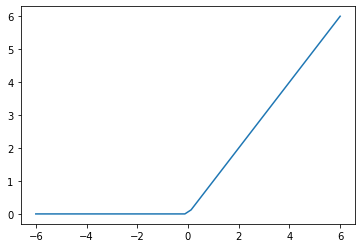

In [57]:
plt.plot(x,y_relu)

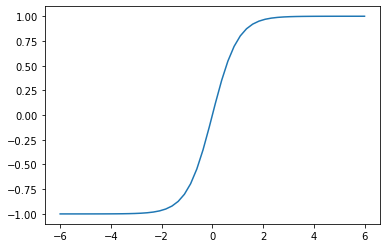

In [58]:
plt.plot(x,np.tanh(x))

$\mathcal{X} \rightarrow \mathcal{Y}$

In [106]:
class MultiLayerPerceptron(torch.nn.Module):
    def __init__(self, D_in, D_out,H=[400,200],lr=1e-4):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(MultiLayerPerceptron,self).__init__()
        self._layers = []
        self._layers.append(torch.nn.Linear(D_in, H[0]))
        for i in range(1,len(H)):
            self._layers.append(torch.nn.Linear(H[i-1],H[i]))
        self._layers.append(torch.nn.Linear(H[-1], D_out))
        for i,layer in enumerate(self._layers):
            self.__setattr__(f'layer{i}', layer)
        self._lr = lr
        
        
    def init_optimiser(self):
        self.loss = torch.nn.CrossEntropyLoss(reduction='mean')
        self.optimizer = torch.optim.SGD(self.parameters(), lr=self._lr)
        
    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        for layer in self._layers[:-1]:
            x = layer(x).clamp(min=0)
        return self._layers[-1](x)
    
    def train(self, inputs, labels, num_training_steps=1000, batch_size=64):
        self.init_optimiser()
        for t in range(num_training_steps):
            idx = np.random.randint(0, MNIST_train.data.shape[0], size = batch_size)
            x = inputs[idx,:]
            # Forward pass: Compute predicted y by passing x to the model
            y_pred = self(x)

            # Compute and print loss
            loss = self.loss(y_pred, labels[idx])
            if t % 100 == 99:
                print(t, loss.item())

            # Zero gradients, perform a backward pass, and update the weights.
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
    
    def check_accuracy(self,inputs,labels):
        predictions = self(inputs)
        print((labels==predictions.argmax(1)).sum()/float(labels.shape[0]))

In [111]:
N, D_in, H, D_out = 64, MNIST_train.data.shape[1], [400,200], len(MNIST_train.classes)

In [115]:
# Construct our model by instantiating the class defined above
model = MultiLayerPerceptron(D_in, D_out, H=H, lr=1e-1)

In [116]:
model.train(MNIST_train.data, MNIST_train.targets, batch_size=64, num_training_steps=10000)

99 0.8041207194328308
199 0.32812052965164185
299 0.22061952948570251
399 0.4095252752304077
499 0.22444668412208557
599 0.40088894963264465
699 0.24320866167545319
799 0.39519548416137695
899 0.2608329653739929
999 0.23255257308483124
1099 0.2928347885608673
1199 0.20748773217201233
1299 0.07594841718673706
1399 0.09598762542009354
1499 0.14402537047863007
1599 0.1407455950975418
1699 0.08133096992969513
1799 0.1128060445189476
1899 0.055791065096855164
1999 0.07754237949848175
2099 0.09230149537324905
2199 0.033358920365571976
2299 0.06229642033576965
2399 0.0292130745947361
2499 0.09734534472227097
2599 0.10554932057857513
2699 0.1250012069940567
2799 0.03526261821389198
2899 0.04766123741865158
2999 0.0261327363550663
3099 0.05821887031197548
3199 0.11985606700181961
3299 0.040989041328430176
3399 0.12473440170288086
3499 0.06542672216892242
3599 0.08947700262069702
3699 0.05768892168998718
3799 0.06453341245651245
3899 0.06907269358634949
3999 0.09770041704177856
4099 0.0984554737

In [117]:
model.check_accuracy(MNIST_train.data, MNIST_train.targets)

tensor(0.9960)


For you to do load test set and check its accuracy